*House Pricing*

*Fase 1 - Pré-processamento e transformação*

**Grupo:** 
* Carlos Gabriel de Freitas - 19.1.4009
* Gabriel Mace dos Santos Ferreira - 19.1.4013
* Filipe Ramos de Souza Santo - 19.1.4027

**Disciplina:** Mineração de Dados (BCC444)

**Professor:** Anderson Almeida Ferreira

In [40]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from copy import copy, deepcopy
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Carregando o dataset de treino
df = pd.read_csv("./train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Análise descritiva

In [4]:
attributes = [
    {
        'name': 'Id',
        'category': 'ordinal_categorical',
        'description': 'Identificação de cada residência no data sheet',
    },
    {
        'name': 'MSSubClass',
        'category': 'nominal_categorical',
        'description': 'Identifica a classificação geral do zoneamento da venda',
    },
    {
        'name': 'MSZoning',
        'category': 'nominal_categorical',
        'description': 'Identifica a classificação geral do zoneamento da venda',
    },
    {
        'name': 'LotFrontage',
        'category': 'continuous_numerical',
        'description': 'Comprimento total das ruas conectadas à propriedade (medido em Linear Feet)',
    },
    {
        'name': 'LotArea',
        'category': 'continuous_numerical',
        'description': 'Área do lote (medido em Square Feet)',
    },
    {
        'name': 'Street',
        'category': 'symmetric_binary',
        'description': 'Tipo de rua de acesso a propriedade',
    },
    {
        'name': 'Alley',
        'category': 'nominal_categorical',
        'description': 'Tipo de beco de acesso à propriedade',
    },
    {
        'name': 'LotShape',
        'category': 'nominal_categorical',
        'description': 'Formato geral da propriedade',
    },
    {
        'name': 'LandContour',
        'category': 'nominal_categorical',
        'description': 'Planicidade da propriedade',
    },
    {
        'name': 'Utilities',
        'category': 'ordinal_categorical',
        'description': 'Tipos de utilidades disponiveis',
    },
    {
        'name': 'LotConfig',
        'category': 'nominal_categorical',
        'description': 'Configuração do lote',
    },
    {
        'name': 'LandSlope',
        'category': 'nominal_categorical',
        'description': 'Inclinação da propriedade',
    },
    {
        'name': 'Neighborhood',
        'category': 'nominal_categorical',
        'description': 'Localizações físicas dentro dos limites da cidade de Ames',
    },
    {
        'name': 'Condition1',
        'category': 'nominal_categorical',
        'description': 'Proximidade da residência à diferentes condições na cidade',
    },
    {
        'name': 'Condition2',
        'category': 'nominal_categorical',
        'description': 'Proximidade da residência à diferentes condições na cidade (caso mais de uma esteja presente)',
    },
    {
        'name': 'BldgType',
        'category': 'nominal_categorical',
        'description': 'Tipo de habitação',
    },
    {
        'name': 'HouseStyle',
        'category': 'nominal_categorial',
        'description': 'Estilo da habitação',
    },
    {
        'name': 'OverallQual',
        'category': 'ordinal_categorical',
        'description': 'Avalia o material total e o acabamento da casa',
    },
    {
        'name': 'OverallCond',
        'category': 'ordinal_categorical',
        'description': 'Avalia a condição geral da casa',
    },
    {
        'name': 'YearBuilt',
        'category': 'discrete_numerical',
        'description': 'Data em que a casa foi construída',
    },
    {
        'name': 'YearRemodAdd',
        'category': 'discrete_numerical',
        'description':'Data em que a casa foi remodelada (idêntico à data de construção se não houverem remodelações ou acréscimos à residência)',
    },
    {
        'name': 'RoofStyle',
        'category': 'nominal_categorical',
        'description': 'Tipo de telhado',
    },
    {
        'name': 'RoofMatl',
        'category': 'nominal_categorical',
        'description': 'Material do telhado',
    },
    {
        'name': 'Exterior1st',
        'category': 'nominal_categorical',
        'description': 'Revestimento exterior em casa',
    },
    {
        'name': 'Exterior2nd',
        'category': 'nominal_categorical',
        'description': 'Revestimento exterior em casa (se há mais de um material)',
    },
    {
        'name': 'MasVnrType',
        'category': 'nominal_categorical',
        'description': 'Tipo de folheado da alvenaria',
    },
    {
        'name': 'MasVnrArea',
        'category': 'continuous_numerical',
        'description': 'Área de folheado da alvenaria (medido em Square Feet)',
    },
    {
        'name': 'ExterQual',
        'category': 'ordinal_categorical',
        'description': 'Avalia a qualidade do material no exterior da casa'
    },
    {
        'name': 'ExterCond',
        'category': 'ordinal_categorical',
        'description': 'Avalia a condição atual do material no exterior da casa',
    },
    {
        'name': 'Foundation',
        'category': 'nominal_categorical',
        'description': 'Tipo de fundação da casa',
    },
    {
        'name': 'BsmtQual',
        'category': 'ordinal_categorical',
        'description': 'Avalia a altura do porão',
    },
    {
        'name': 'BsmtCond',
        'category': 'ordinal_categorical',
        'description': 'Avalia a condição geral do porão',
    },
    {
        'name': 'BsmtExposure',
        'category': 'ordinal_categorical',
        'description': 'Refere-se a walkout ou paredes no nível do jardim',
    },
    {
        'name': 'BsmtFinType1',
        'category': 'ordinal_categorical',
        'description': 'Classificação da área finalizada do porão'
    },
    {
        'name': 'BsmtFinSF1',
        'category': 'discrete_numerical',
        'description': 'Área finalizada Tipo 1 (medida em Square Feet)',
    },
    {
        'name': 'BsmtFinType2',
        'category': 'ordinal_categorical',
        'description': 'Classificação da área finalizada do porão (caso tenham múltiplos tipos)',
    },
    {
        'name': 'BsmtFinSF2',
        'category': 'discrete_numerical',
        'description': 'Área finalizada Tipo 2 (medida em Square Feet)',
    },
    {
        'name': 'BsmtUnfSF',
        'category': 'discrete_numerical',
        'description': 'Área não finalizada do porão (medida em Square Feet)',
    },
    {
        'name': 'TotalBsmtSF',
        'category': 'discrete_numerical',
        'description': 'Área total do porão (medida em Square Feet)',
    },
    {
        'name': 'Heating',
        'category': 'nominal_categorical',
        'description': 'Tipo de Aquecimento',
    },
    {
        'name': 'HeatingQC',
        'category': 'ordinal_categorical',
        'description': 'Qualidade e condição do aquecimento',
    },
    {
        'name': 'CentralAir',
        'category': 'asymmetric_binary',
        'description': 'Ar condicionado central',
    },
    {
        'name': 'Electrical',
        'category': 'nominal_categorical',
        'description': 'Sistema elétrico',
    },
    {
        'name': '1stFlrSF',
        'category': 'discrete_numerical',
        'description': 'Área do primeiro andar (medido em Square Feet)',
    },
    {
        'name': '2ndFlrSF',
        'category': 'discrete_numerical',
        'description': 'Área do segundo andar (medida em Square Feet)',
    },
    {
        'name': 'LowQualFinSF',
        'category': 'discrete_numerical',
        'description': 'Área finalizada em baixa qualidade (medida em Square Feet)',
    },
    {
        'name': 'GrLivArea',
        'category': 'discrete_numerical',
        'description': 'Área habitável acima do nível do solo (medida em Square Feet)',
    },
    {
        'name': 'BsmtFullBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros no porão',
    },
    {
        'name': 'BsmtHalfBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros de hóspede no porão',
    },
    {
        'name': 'FullBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros',
    },
    {
        'name': 'HalfBath',
        'category': 'discrete_numerical',
        'description': 'Número de banheiros de hóspede',
    },
    {
        'name': 'BedroomAbvGr',
        'category': 'discrete_numerical',
        'description': 'Número de quartos acima do nível do solo (Não inclui quartos no porão)',
    },
    {
        'name': 'KitchenAbvGr',
        'category': 'discrete_numerical',
        'description': 'Número de cozinhas acima do nível do solo',
    },
    {
        'name': 'KitchenQual',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da cozinha',
    },
    {
        'name': 'TotRmsAbvGrd',
        'category': 'discrete_numerical',
        'description': 'Número total de cômodos acima do nível do solo (não inclui banheiros)',
    },
    {
        'name': 'Functional',
        'category': 'nominal_categorical',
        'description': 'Funcionalidade da residência (É assumida funcionalidade típica até serem requisitadas investigações)',
    },
    {
        'name': 'Fireplaces',
        'category': 'discrete_numerical',
        'description': 'Número de lareiras na residência',
    },
    {
        'name': 'FireplaceQu',
        'category': 'ordinal_categorical',
        'description': 'Qualidade das lareiras',
    },
    {
        'name': 'GarageType',
        'category': 'nominal_categorical',
        'description': 'Localização da garagem',
    },
    {
        'name': 'GarageYrBlt',
        'category': 'discrete_numerical',
        'description': 'Ano de construção da garagem',
    },
    {
        'name': 'GarageFinish',
        'category': 'ordinal_categorical',
        'description': 'Acabamento interno da garagem',
    },
    {
        'name': 'GarageCars',
        'category': 'discrete_numerical',
        'description': 'Tamanho da garagem (medida em capacidade para armazenar carros)',
    },
    {
        'name': 'GarageArea',
        'category': 'discrete_numerical',
        'description': 'Tamanho da garagem (medida em Square Feet)',
    },
    {
        'name': 'GarageQual',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da garagem',
    },
    {
        'name': 'GarageCond',
        'category': 'ordinal_categorical',
        'description': 'Condição da garagem',
    },
    {
        'name': 'PavedDrive',
        'category': 'nominal_categorical',
        'description': 'Pavimento da entrada da garagem',
    },
    {
        'name': 'WoodDeckSF',
        'category': 'discrete_numerical',
        'description': 'Área do deck de madeira (medida em Square Feet)',
    },
    {
        'name': 'OpenPorchSF',
        'category': 'discrete_numerical',
        'description': 'Área da varanda aberta (medida em Square Feet)',
    },
    {
        'name': 'EnclosedPorch',
        'category': 'discrete_numerical',
        'description': 'Área da varanda fechada (medida em Square Feet)',
    },
    {
        'name': '3SsnPorch',
        'category': 'discrete_numerical',
        'description': 'Área da varanda de três estações(medida em Square Feet)',
    },
    {
        'name': 'ScreenPorch',
        'category': 'discrete_numerical',
        'description': 'Área da varanda com telas (medida em Square Feet)',
    },
    {
        'name': 'PoolArea',
        'category': 'discrete_numerical',
        'description': 'Área da piscina (medida em Square Feet)',
    },
    {
        'name': 'PoolQC',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da piscina',
    },
    {
        'name': 'Fence',
        'category': 'ordinal_categorical',
        'description': 'Qualidade da cerca',
    },
    {
        'name': 'MiscFeature',
        'category': 'nominal_categorical',
        'description': 'Recurso variado que não se encaixa em outras categorias',
    },
    {
        'name': 'MiscVal',
        'category': 'continuous_numerical',
        'description': 'Valor monetário do recurso variado (medido em $)',
    },
    {
        'name': 'MoSold',
        'category': 'discrete_numerical',
        'description': 'Mês de venda (MM)',
    },
    {
        'name': 'YrSold',
        'category': 'discrete_numerical',
        'description': 'Ano de venda (YYYY)',
    },
    {
        'name': 'SaleType',
        'category': 'nominal_categorical',
        'description': 'Tipo da venda',
    },
    {
        'name': 'SaleCondition',
        'category': 'nominal_categorical',
        'description': 'Condição para venda',
    },
    {
        'name': 'SalePrice',
        'category': 'continuous_numerical',
        'description': 'Valor da venda (medido em $)',
    },
]

In [5]:
# Imprimindo as informações de cada atributo
for attribute in attributes:
    print(f"{attribute['name']}")
    print("Categoria: ", end = "")

    if attribute["category"] == "nominal_categorical":
        print("Categórico Nominal")
    elif attribute["category"] == "ordinal_categorical":
        print("Categórico Ordinal")
    elif attribute["category"] == "discrete_numerical":
        print("Numérico Discreto")
    elif attribute["category"] == "continuous_numerical":
        print("Numérico Contínuo")
    elif attribute["category"] == "symmetric_binary":
        print("Binário Simétrico")
    elif attribute["category"] == "asymmetric_binary":
        print("Binário Assimétrico")

    print(f"Descrição: {attribute['description']}")
    print(f"Exemplos de valores: {df[attribute['name']].unique()[:5]}\n")

Id
Categoria: Categórico Ordinal
Descrição: Identificação de cada residência no data sheet
Exemplos de valores: [1 2 3 4 5]

MSSubClass
Categoria: Categórico Nominal
Descrição: Identifica a classificação geral do zoneamento da venda
Exemplos de valores: [ 60  20  70  50 190]

MSZoning
Categoria: Categórico Nominal
Descrição: Identifica a classificação geral do zoneamento da venda
Exemplos de valores: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage
Categoria: Numérico Contínuo
Descrição: Comprimento total das ruas conectadas à propriedade (medido em Linear Feet)
Exemplos de valores: [65. 80. 68. 60. 84.]

LotArea
Categoria: Numérico Contínuo
Descrição: Área do lote (medido em Square Feet)
Exemplos de valores: [ 8450  9600 11250  9550 14260]

Street
Categoria: Binário Simétrico
Descrição: Tipo de rua de acesso a propriedade
Exemplos de valores: ['Pave' 'Grvl']

Alley
Categoria: Categórico Nominal
Descrição: Tipo de beco de acesso à propriedade
Exemplos de valores: [nan 'Grvl' 'Pave']

LotSh

In [6]:
# Compondo listas contendo os nomes dos atributos de cada categoria
nominal_categorical = []
ordinal_categorical = []
discrete_numerical = []
continuous_numerical = []
symmetric_binary = []
asymmetric_binary = []

for attribute in attributes:
    if attribute["category"] == "nominal_categorical":
        nominal_categorical.append(attribute['name'])
    elif attribute["category"] == "ordinal_categorical":
        ordinal_categorical.append(attribute['name'])
    elif attribute["category"] == "discrete_numerical":
        discrete_numerical.append(attribute['name'])
    elif attribute["category"] == "continuous_numerical":
        continuous_numerical.append(attribute['name'])
    elif attribute["category"] == "symmetric_binary":
        symmetric_binary.append(attribute['name'])
    elif attribute["category"] == "asymmetric_binary":
        asymmetric_binary.append(attribute['name'])

numerical = copy(discrete_numerical)
numerical.extend(continuous_numerical)

categorical = copy(nominal_categorical)
categorical.extend(ordinal_categorical)

binary = copy(symmetric_binary)
binary.extend(asymmetric_binary)

**Justificativas:**

Categórico Nominal: o atributo é qualitativo e identifica algo (como um nome).

Categórico Ordinal: o atributo é qualitativo, identifica algo e possui uma ordem.

Numérico Discreto: o atributo é quantitativo e assume valores discretos (inteiros).

Numérico Contínuo: o atributo é quantitativo e assume valores contínuos (reais).

Binário Simétrico: o atributo assume apenas 2 valores que possuem a mesma importância.

Binário Assimétrico: o atributo assume apenas 2 valores que não possuem a mesma importância.

In [7]:
# Imprimindo informações sobre os atributos numéricos
for attribute in attributes:
    if (attribute['category'] == 'discrete_numerical') or (attribute['category'] == 'continuous_numerical'):
        name = attribute['name']
        print(f"Atributo: {name}")
        print(f'Intervalo de Valores = [{df[name].min()} ~ {df[name].max()}]')
        print(f'Valor Médio = {df[name].mean()}')
        print(f'Valor Mínimo = {df[name].min()}')
        print(f'Valor Máximo = {df[name].max()}')
        print(f'Desvio Padrão = {df[name].std()}\n')

Atributo: LotFrontage
Intervalo de Valores = [21.0 ~ 313.0]
Valor Médio = 70.04995836802665
Valor Mínimo = 21.0
Valor Máximo = 313.0
Desvio Padrão = 24.284751774483183

Atributo: LotArea
Intervalo de Valores = [1300 ~ 215245]
Valor Médio = 10516.828082191782
Valor Mínimo = 1300
Valor Máximo = 215245
Desvio Padrão = 9981.264932379147

Atributo: YearBuilt
Intervalo de Valores = [1872 ~ 2010]
Valor Médio = 1971.267808219178
Valor Mínimo = 1872
Valor Máximo = 2010
Desvio Padrão = 30.202904042525265

Atributo: YearRemodAdd
Intervalo de Valores = [1950 ~ 2010]
Valor Médio = 1984.8657534246574
Valor Mínimo = 1950
Valor Máximo = 2010
Desvio Padrão = 20.645406807709396

Atributo: MasVnrArea
Intervalo de Valores = [0.0 ~ 1600.0]
Valor Médio = 103.68526170798899
Valor Mínimo = 0.0
Valor Máximo = 1600.0
Desvio Padrão = 181.06620658721818

Atributo: BsmtFinSF1
Intervalo de Valores = [0 ~ 5644]
Valor Médio = 443.6397260273973
Valor Mínimo = 0
Valor Máximo = 5644
Desvio Padrão = 456.09809084092456

A

In [8]:
# Separando os atributos discretos em grupos de acordo com o valor máximo apresentado
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []

for attribute in discrete_numerical:
    max_value = df[attribute].max()
    if max_value <= 100:
        group_1.append(attribute)
    elif max_value <= 500:
        group_2.append(attribute)
    elif max_value <= 1000:
        group_3.append(attribute)
    elif max_value <= 2000:
        group_4.append(attribute)
    else:
        group_5.append(attribute)

<AxesSubplot:>

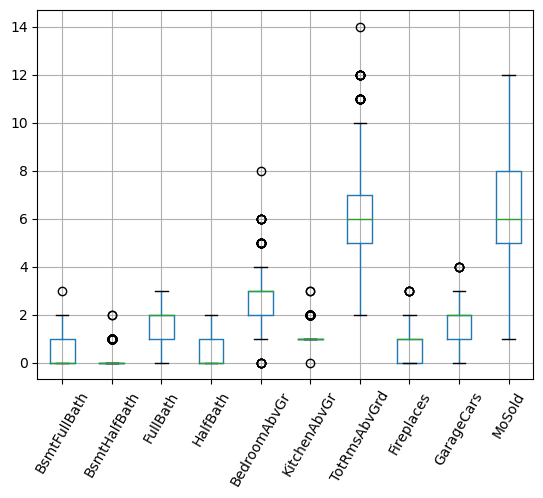

In [9]:
df.boxplot(column = group_1, rot = 60, fontsize = 10)

<AxesSubplot:>

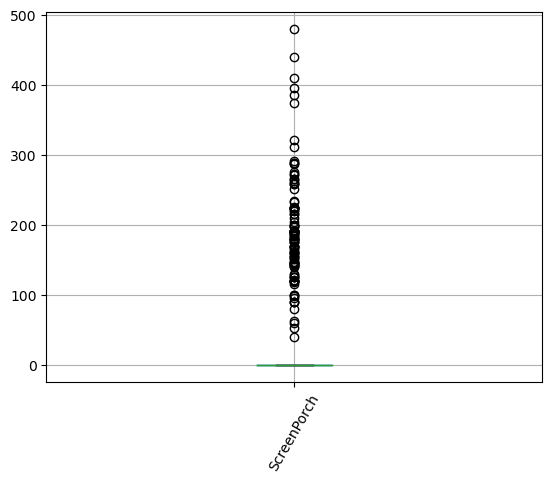

In [10]:
df.boxplot(column = group_2, rot = 60, fontsize = 10)

<AxesSubplot:>

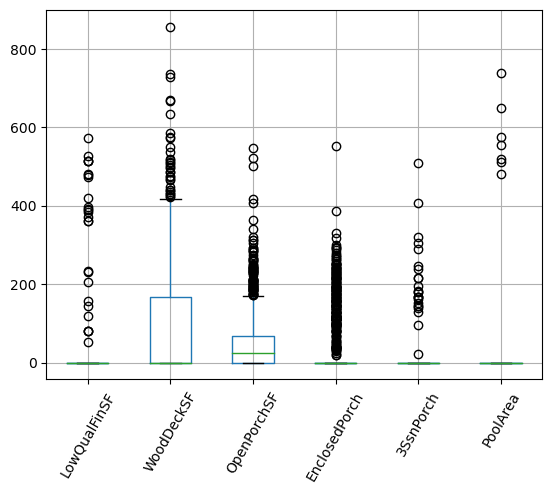

In [11]:
df.boxplot(column = group_3, rot = 60, fontsize = 10)

<AxesSubplot:>

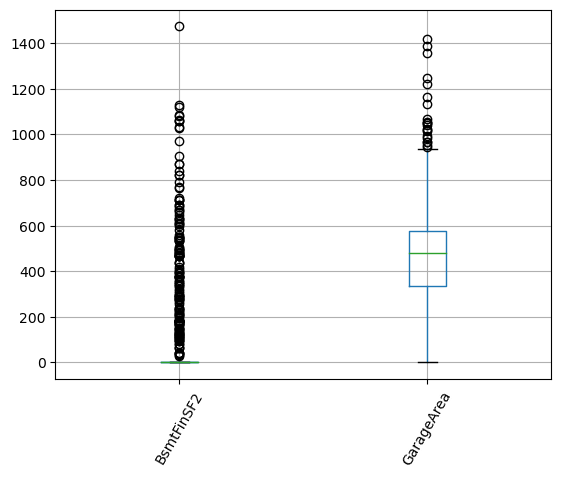

In [12]:
df.boxplot(column = group_4, rot = 60, fontsize = 10)

<AxesSubplot:>

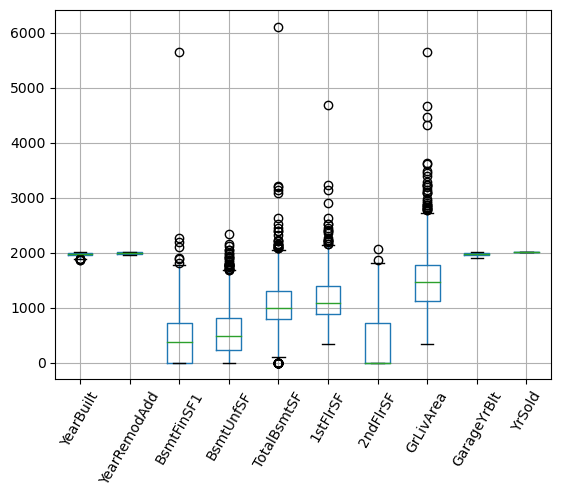

In [13]:
df.boxplot(column = group_5, rot = 60, fontsize = 10)

In [14]:
# Cada atributo contínuo será plotado individualmente devido a
# - pequena quantidade de atributos contínuos;
# - grande disparidade nos intervalos de valores de tais atributos.
continuous_numerical

['LotFrontage', 'LotArea', 'MasVnrArea', 'MiscVal', 'SalePrice']

<AxesSubplot:>

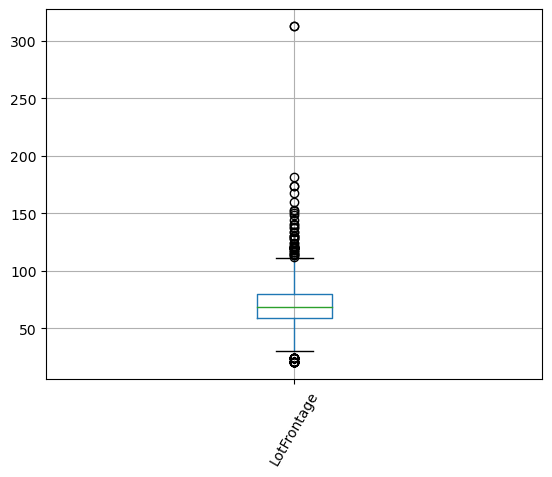

In [15]:
df.boxplot(column = ['LotFrontage'], rot = 60, fontsize = 10)

<AxesSubplot:>

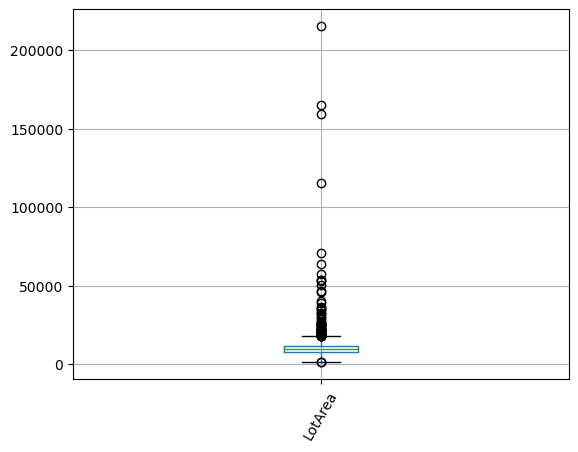

In [16]:
df.boxplot(column = ['LotArea'], rot = 60, fontsize = 10)

<AxesSubplot:>

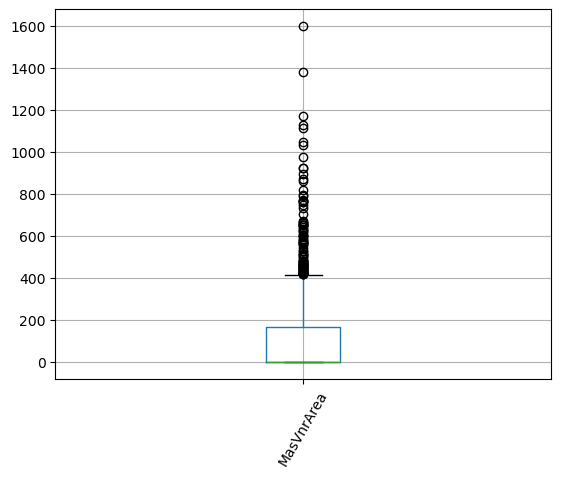

In [17]:
df.boxplot(column = ['MasVnrArea'], rot = 60, fontsize = 10)

<AxesSubplot:>

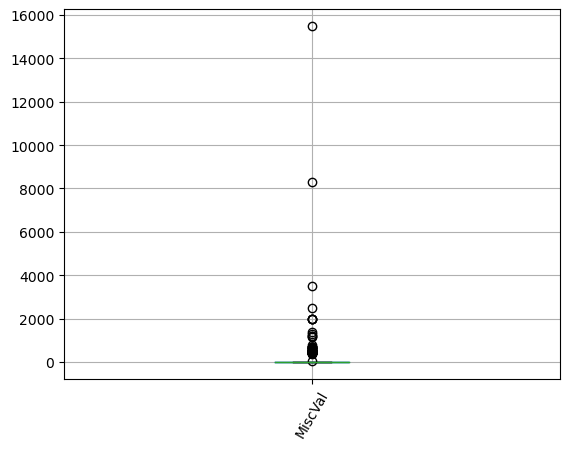

In [18]:
df.boxplot(column = ['MiscVal'], rot = 60, fontsize = 10)

<AxesSubplot:>

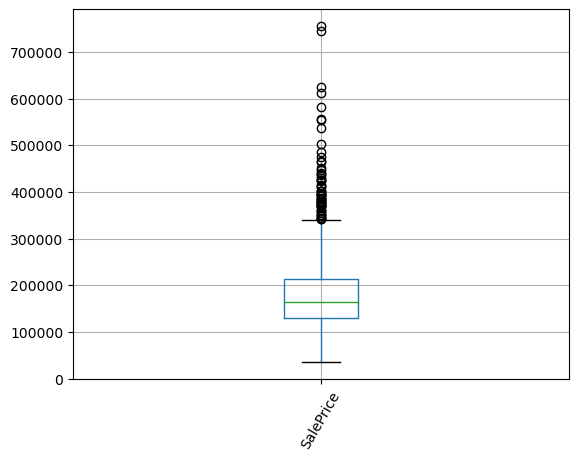

In [19]:
df.boxplot(column = ['SalePrice'], rot = 60, fontsize = 10)

In [20]:
# Identificação dos valores ausentes, aberrantes e inconsistências
pd.options.display.min_rows = 82
print("Quantidade de Valores Ausentes para cada atributo: \n")

null_attribute = []

for attribute in list(df):
   if df[attribute].isnull().sum() != 0:
      print(f'{attribute}: {df[attribute].isnull().sum()}')
      null_attribute.append(attribute)


Quantidade de Valores Ausentes para cada atributo: 

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


É possível observar que grande parte dos valores nulos ocorrem em atributos com a categoria "NA" que indica a falta da comodidade relacionada ao atributo, como por exemplo a falta de cerca ou piscina para os atributos Fence e PoolQC respectivamente. Logo, nessas situações é possível substituir os valores nulos pela opção previamente mencionada.

Dito isso, em situações como no atributo LotFeature que se encontra nulo não é possível identificar uma forma de substituir os valores caso existam ruas que se conectam à propriedade, logo a estratégia escolhida foi a substituição dos valores nulos por zero. 

In [21]:
print("Tabela com inconsistências para o tamanho de uma residência: \n")

print(df.loc[(df['HouseStyle'] == '1.5Fin') & (df['2ndFlrSF'] == 0)])

print("Tabelas com inconsistências para a inclinação de uma propriedade e sua planicidade: \n")

print(df.loc[(df['LandContour'] == 'Lvl') & (df['LandSlope'] == 'Sev')]) 

print(df.loc[(df['LandContour'] == 'HLS') & (df['LandSlope'] == 'Gtl')]) 

Tabela com inconsistências para o tamanho de uma residência: 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
263    264          50       RM         50.0     5500   Pave   NaN      Reg   
406    407          50       RL         51.0    10480   Pave   NaN      Reg   
729    730          30       RM         52.0     6240   Pave  Grvl      Reg   
1009  1010          50       RL         60.0     6000   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
51           Lvl    AllPub  ...        0    NaN  MnPrv        Shed     400   
88           Lvl    AllPub  ...        0    NaN  MnPrv         NaN   

A análise de inconsistências foi feita visando pares de atributos que se influenciam, por exemplo HouseStyle e 2ndFlrSf, dado que se caso uma residência possui um estilo de dois andares finalizados é lógico que seu segunda andar possua uma área diferente de 0. 

De forma semelhante, foi considerado que o atributo LandContour que identifica a planicidade da propriedade e o atributo LandSlope que identifica a inclinação da propriedade estão intimamente relacionadas, logo se o LandContour indica que a propriedade é plana consequentemente o LandSlope deveria ser "Gnt", dito isso os prints acima demonstram inconsistências presentes entre estes atributos.

A partir da análise dos gráficos de boxplot é possível afirmar que existem outliers para todas as variáveis, com excessão das variáveis MOSold, GarageYrBlt e YrSold, em situações que superam o valor máximo da média previamente identificada durante a plotagem do boxplot. Vale ressaltar que em certas situações como nas variáveis BedroomAbvGr, KitchenAbvGr, YearBuilt, TotalBsmtSF, LotFrontage, LotArea os outliers também ocorrem em valores menores do que a média.

In [22]:
def probability(qtd, total):
  return qtd/total

In [23]:
discrete_categories = ['discrete_numerical', 'nominal_categorical', 'ordinal_categorical', 'symetric_binary', 'assymetric_binary']
for atribute in attributes:
    if atribute.get('category') in discrete_categories:
        print(f"Valores possíveis para {atribute.get('name')}: {df[atribute.get('name')].unique()}\n\n")

Valores possíveis para Id: [   1    2    3 ... 1458 1459 1460]


Valores possíveis para MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


Valores possíveis para MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']


Valores possíveis para Alley: [nan 'Grvl' 'Pave']


Valores possíveis para LotShape: ['Reg' 'IR1' 'IR2' 'IR3']


Valores possíveis para LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']


Valores possíveis para Utilities: ['AllPub' 'NoSeWa']


Valores possíveis para LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Valores possíveis para LandSlope: ['Gtl' 'Mod' 'Sev']


Valores possíveis para Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Valores possíveis para Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Valores poss

In [ ]:
for atribute in attributes:
    if atribute.get('category') in discrete_categories:
        print(f"Atributo: {atribute.get('name')}")
        for value in df[atribute.get("name")].unique():
            try:
                print(f"Probabilidade de {value}: {probability(df[atribute.get('name')].value_counts()[value], len(df.index))}")
            except:
                continue
        print("\n")

Se executarmos a célula acima, será mostrado a probabilidade de cada valor possível em cada atributo.

Porém devido ao alto volume de atributos a célula de ouput se torna muito grande e dificulta a visualização, a titulo de exemplificação na célula abaixo é mostrada a probabilidade de cada valor possível para o atributo _Utilities_.

In [24]:
print(f"Probabilidade de cada valor Utilities: \n{probability(df['Utilities'].value_counts(), len(df.index))}")

Probabilidade de cada valor Utilities: 
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


In [25]:
print(f"Quantidade de Valores Ausentes para cada atributo: \n{df.isnull().sum()}\n")

Quantidade de Valores Ausentes para cada atributo: 
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
Ga

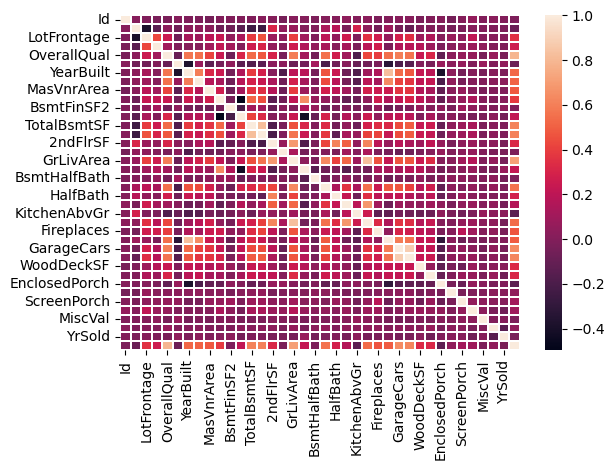

In [26]:
correlation = df.corr(numeric_only=True)
sn.heatmap(correlation, annot = False, linewidths=.1, square=False)
plt.tight_layout()
plt.show()

## Correlação entre os atributos

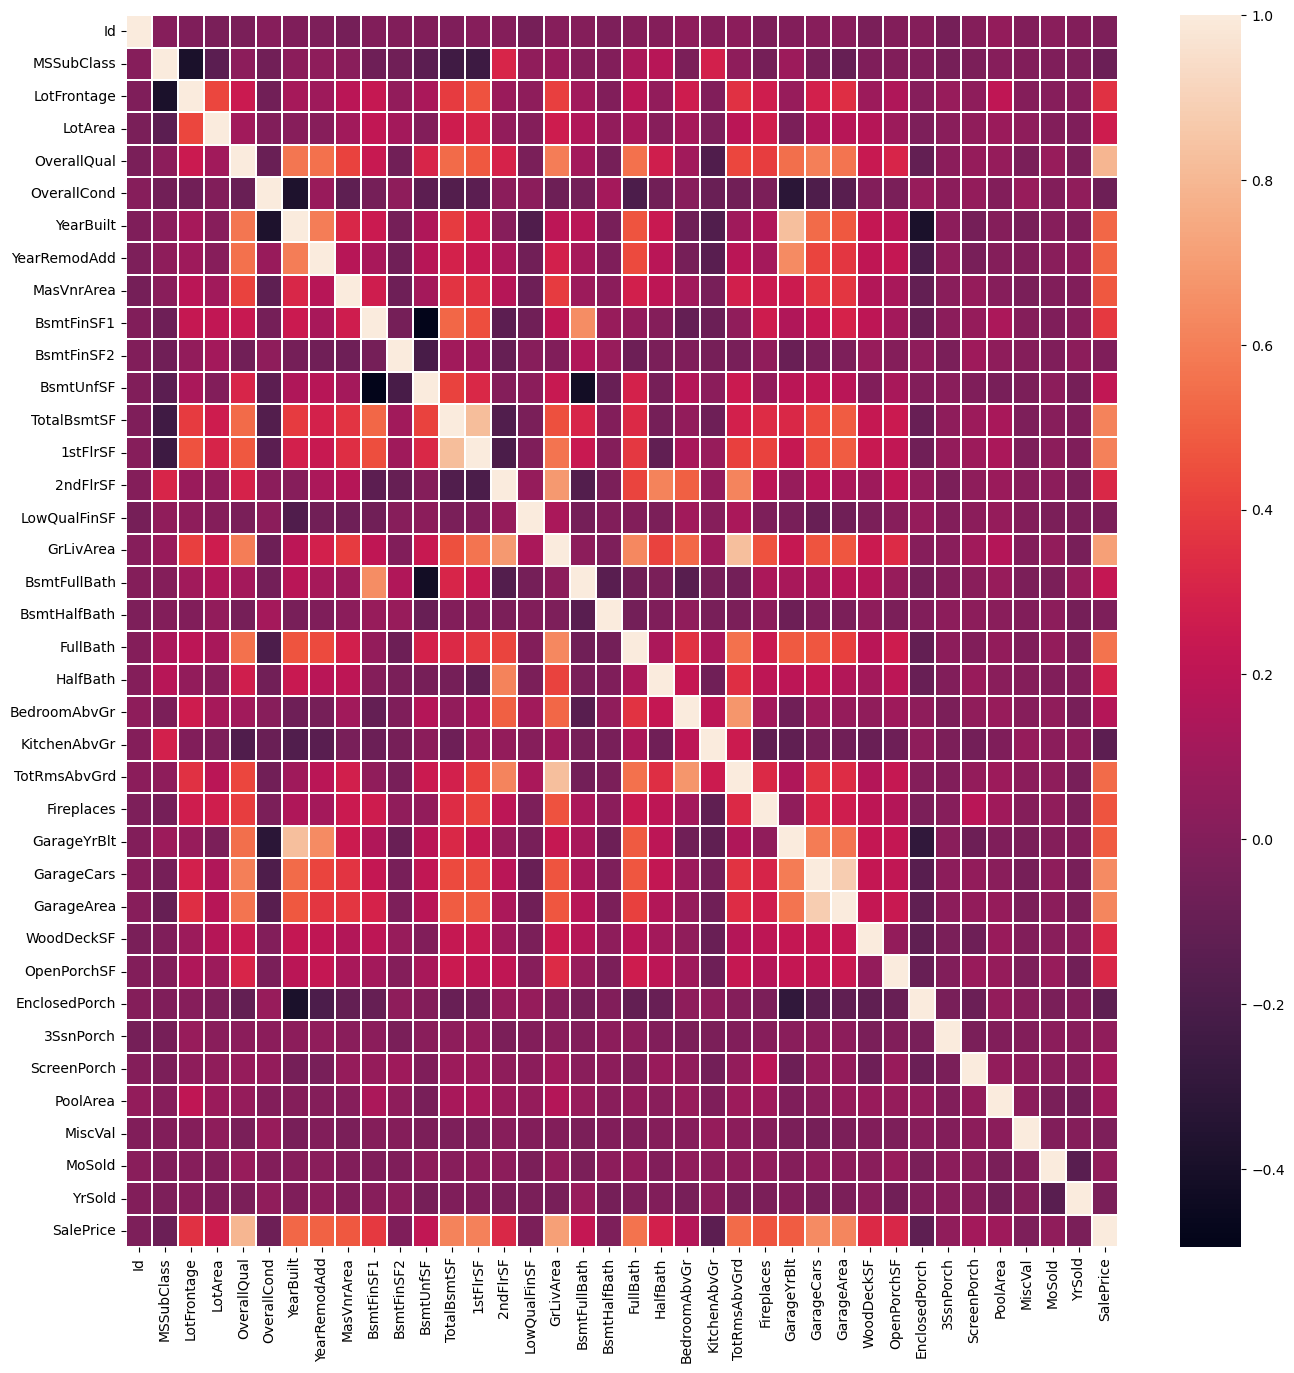

In [31]:
# Mostrando algumas correlações entre os atributos 
correlation = df.corr(numeric_only=True)
plt.figure(figsize = (16, 16))
plot = sn.heatmap(correlation, annot = False, fmt=".2f", linewidths=.3)
plt.show()

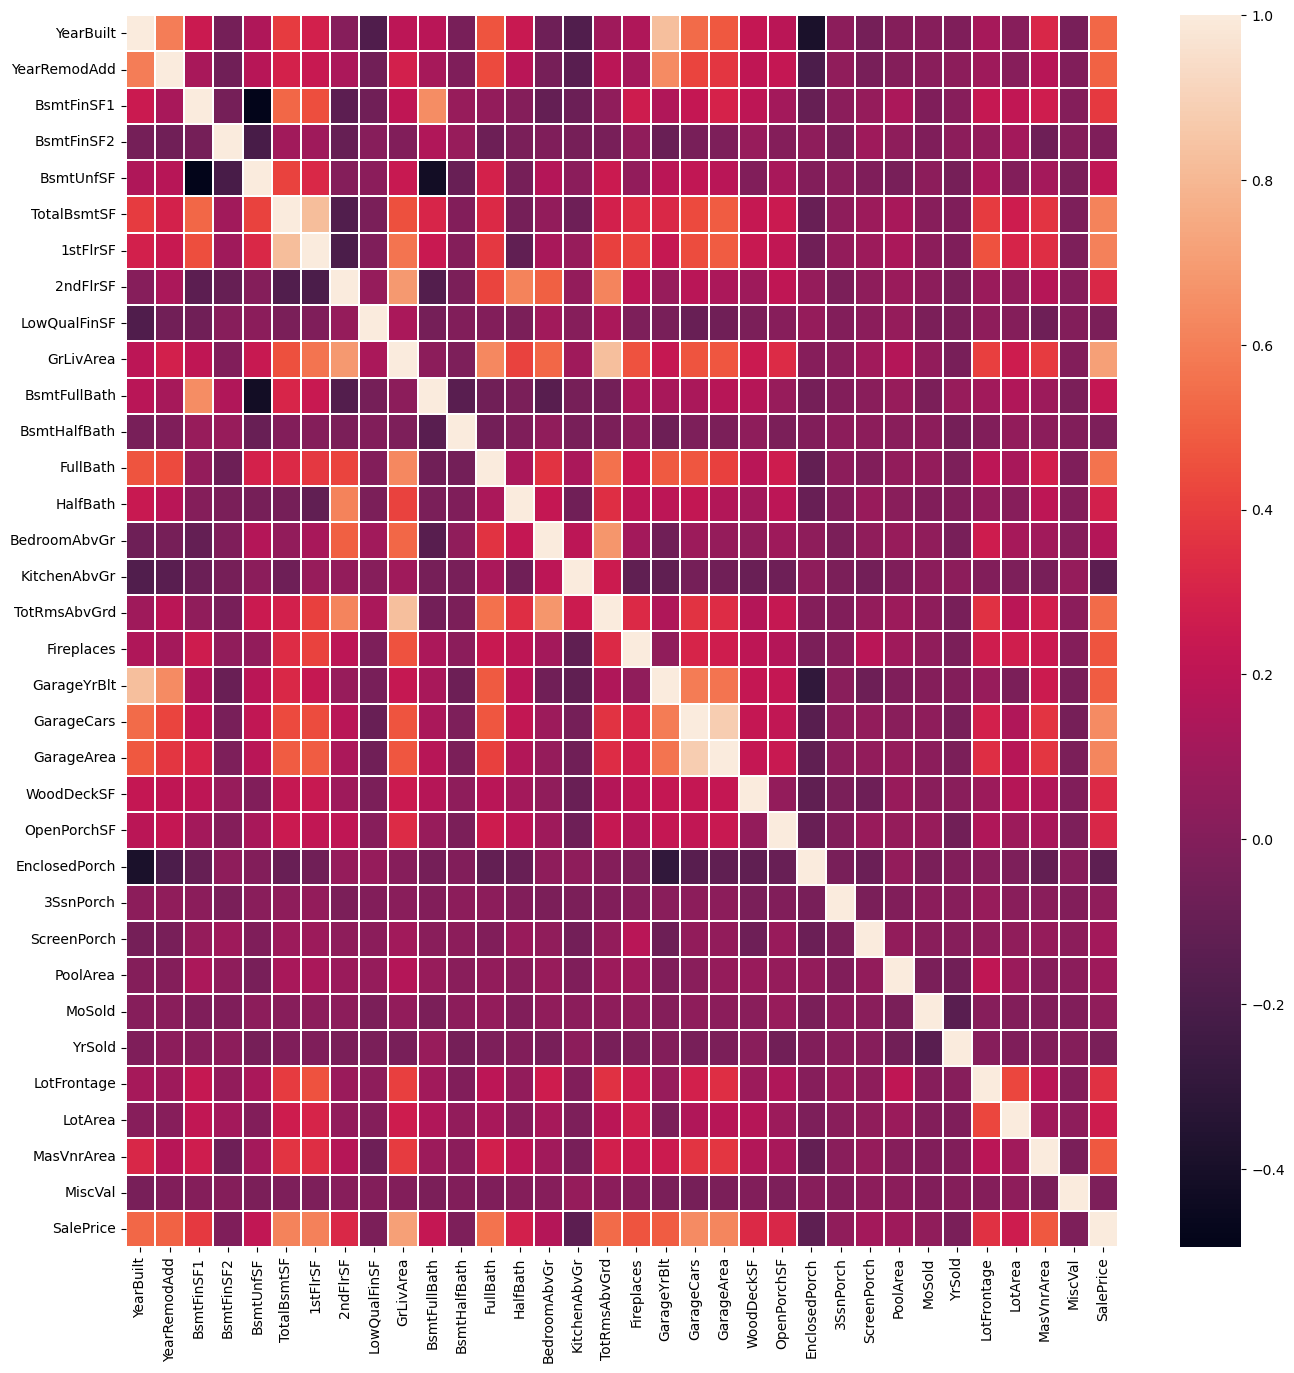

In [34]:
# Mostrando a correlação entre os atributos numéricos
correlation = df[numerical].corr(numeric_only=True)
plt.figure(figsize = (16, 16))
plot = sn.heatmap(correlation, annot = False, fmt=".2f", linewidths=.3)
plt.show()

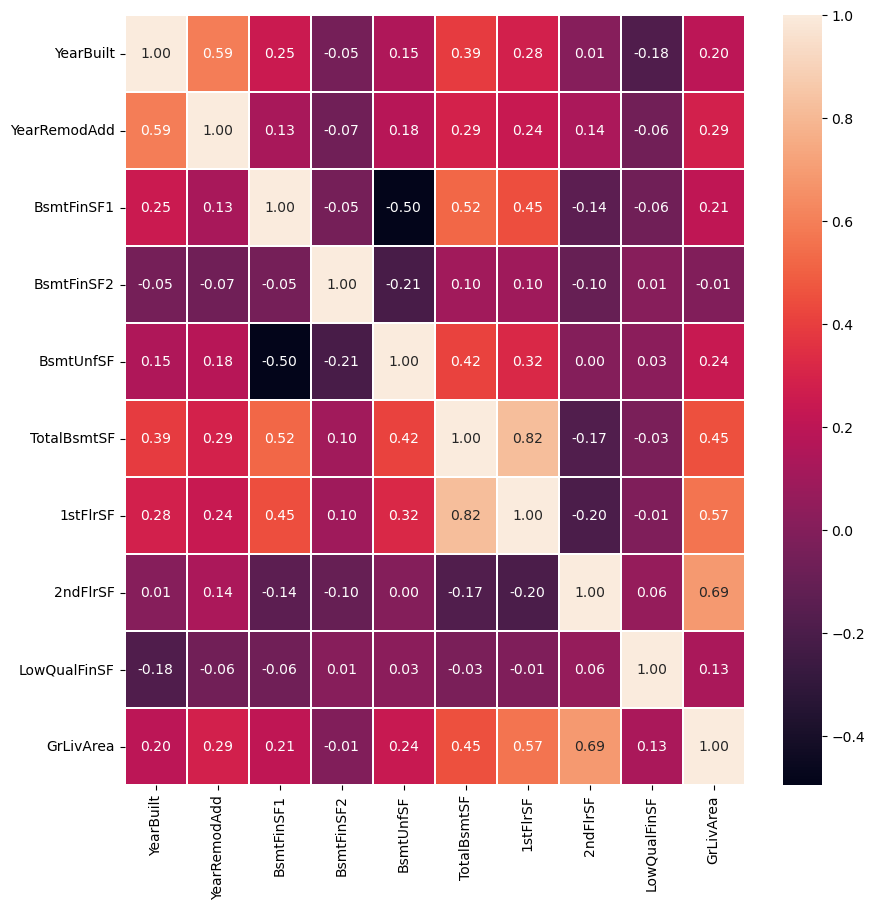

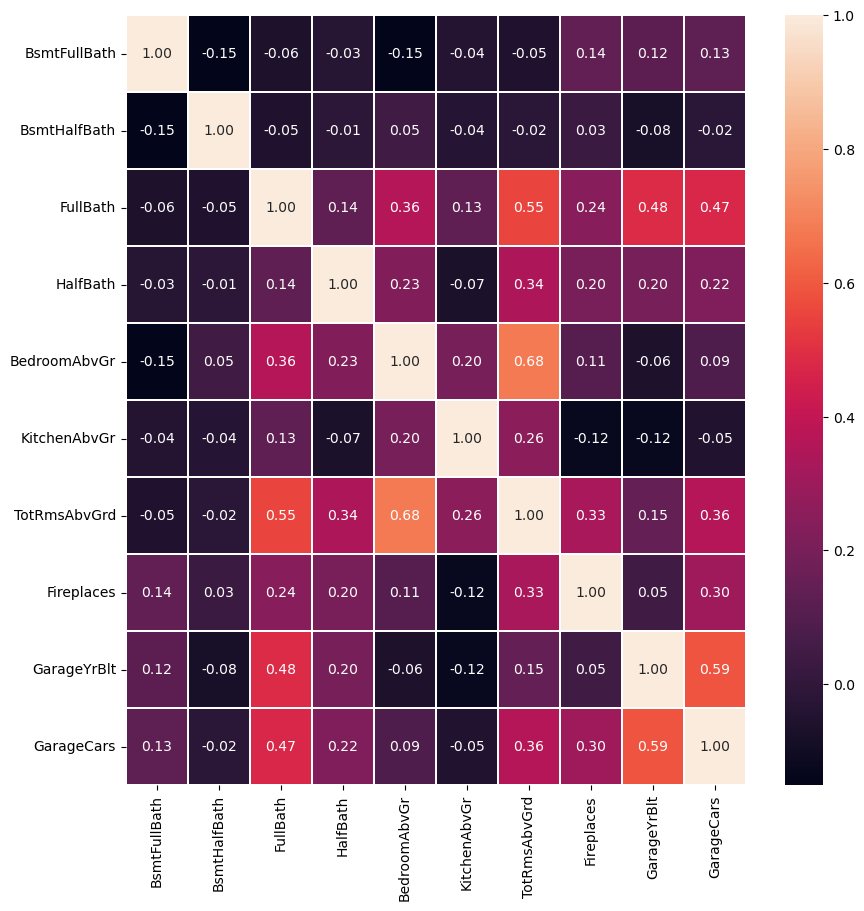

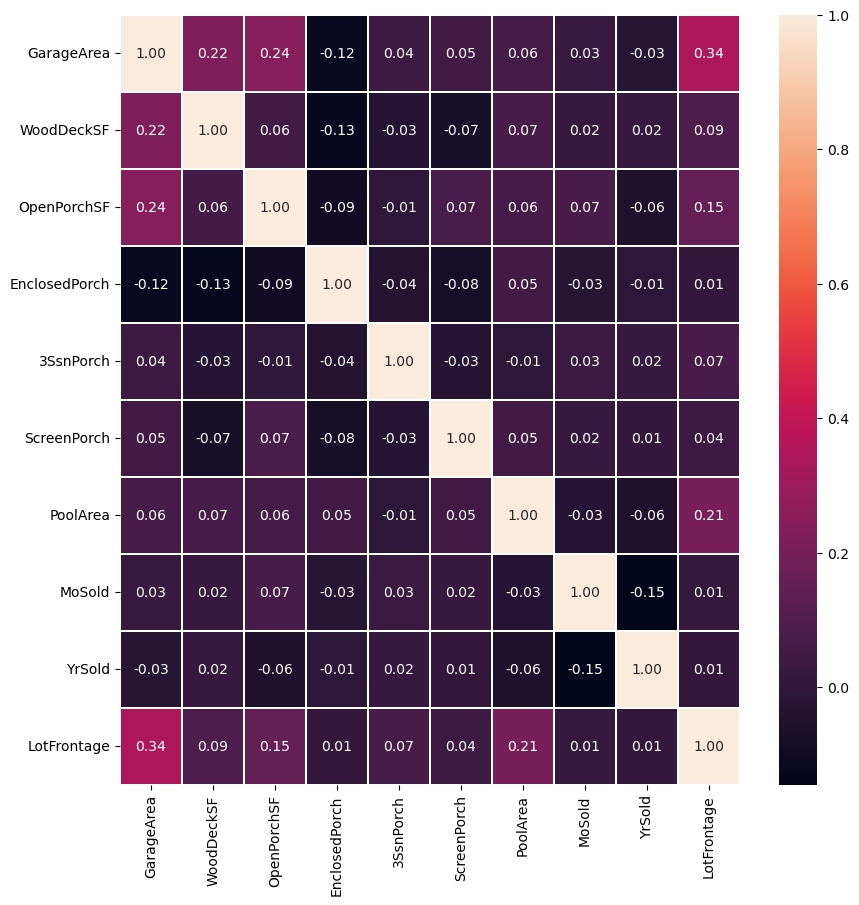

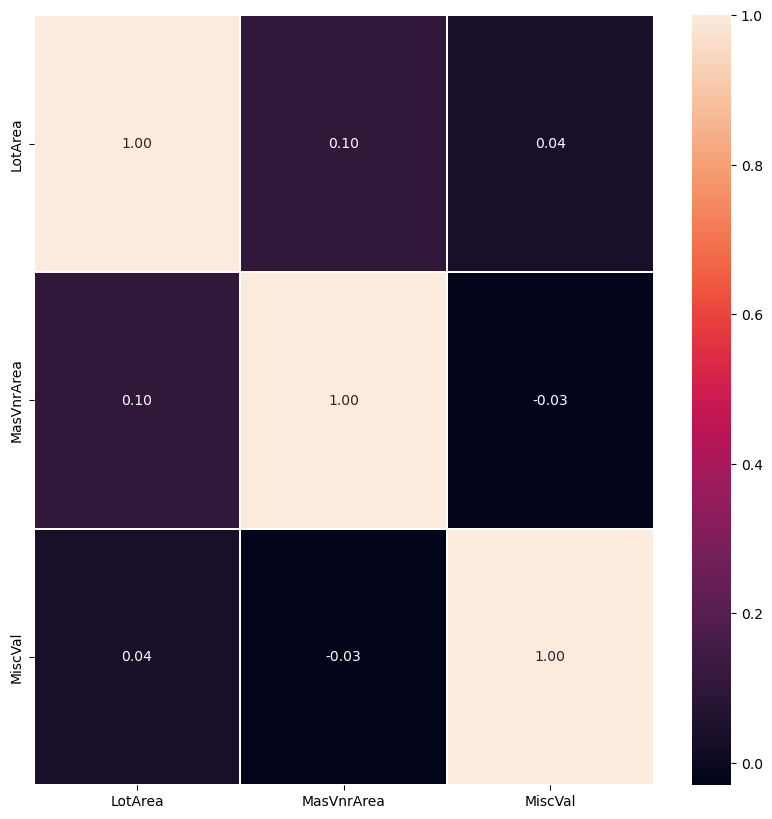

In [29]:
# Exemplo: Mostrando a correlação entre subsets dos atributos numéricos
incrementation = 10

for column_index in range(0, len(numerical), incrementation):
    if column_index + incrementation < len(numerical) - 1:
        end_index = column_index + incrementation 
    else:
        end_index = len(numerical) - 1

    subset = list(numerical[column_index:end_index])

    correlation = df[subset].corr(numeric_only=True)
    plt.figure(figsize = (10, 10))
    plot = sn.heatmap(correlation, annot = True, fmt=".2f", linewidths=.3)
    plt.show()

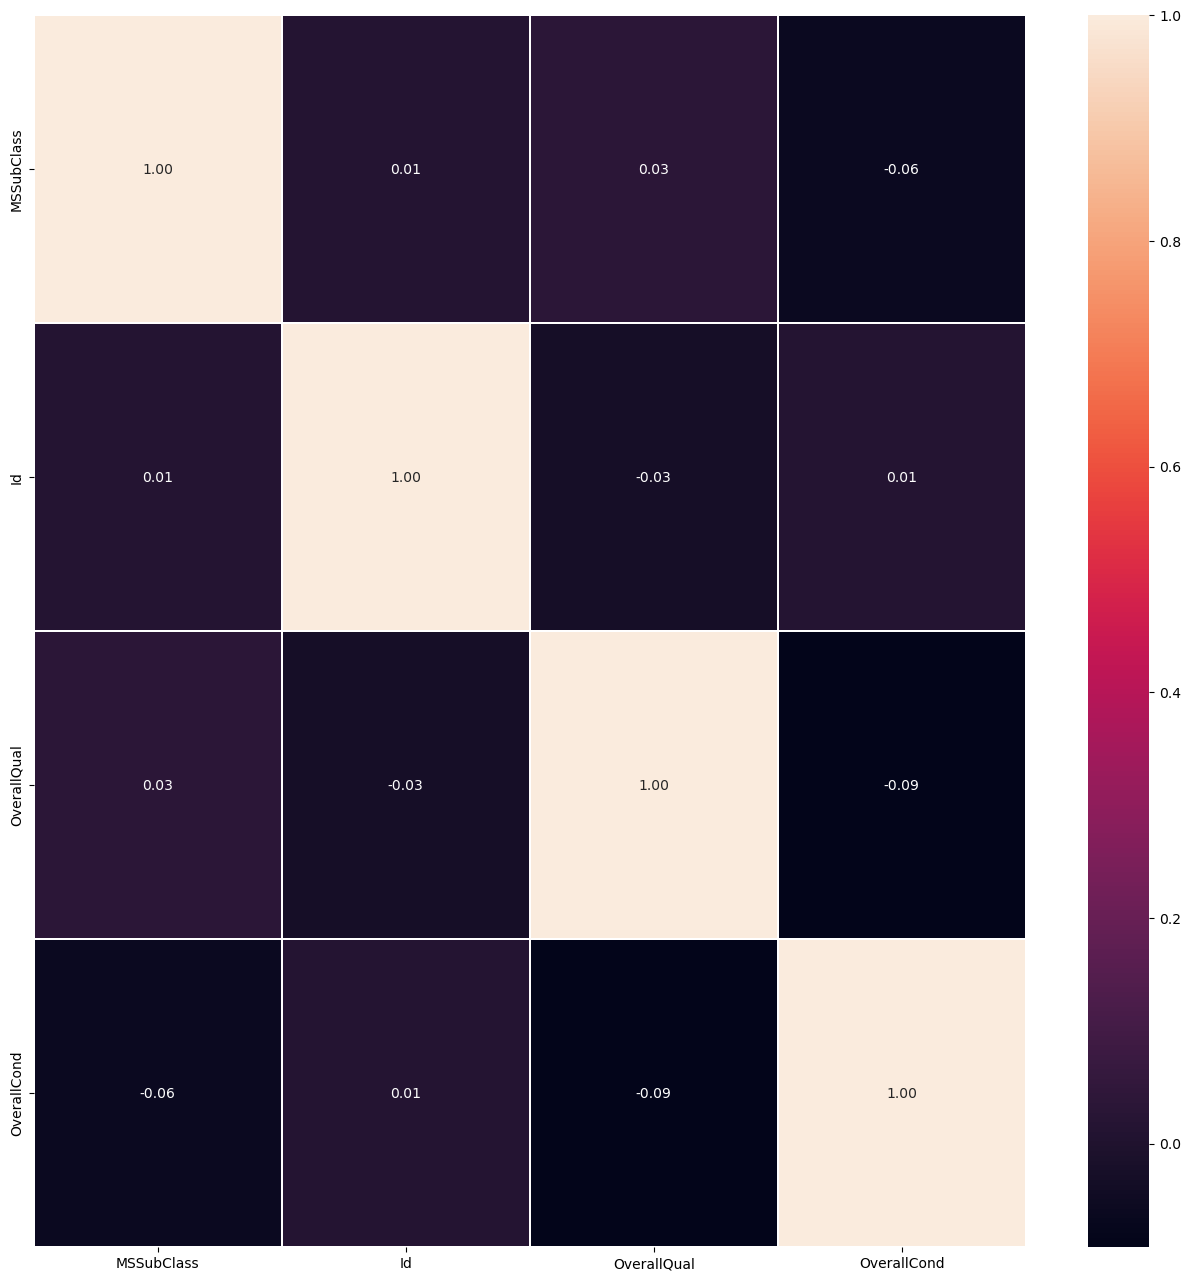

In [30]:
# Mostrando a correlação entre os atributos categóricos
correlation = df[categorical].corr(numeric_only=True)
plt.figure(figsize = (16, 16))
plot = sn.heatmap(correlation, annot = True, fmt=".2f", linewidths=.3)
plt.show()

# Escrever analise do heatmap

Primeiramente, os valores dos coeficientes de correlação de Pearson apresentados no mapa de calor dizem o quão correlacionados dois atributos são: quanto mais próximos de 1 ou -1 o coeficiente for, mais correlacionados são os atributos.

É possível observar no mapa de calor que os atributos que possuem a maior correlação são o valor pago pelo bilhete do Titanic e a classe do alojamento. Dado que, os assentos presentes na primeira classse, usualmente, são mais caros quando comparados com os assentos da terceira classe.

Também vemos uma correlação entre a quantidade de irmãos e esposas, com a quantidade de pais e filhos que um individuo tem abordo no navio. Isso pode acontecer pois muito indivíduos poderiam estar fazendo uma viagem em família.

E por último, temos uma correlação entre a idade do individuo e a classe de seu alojamento. Para essa, não conseguimos identificar uma explicação para a correlação.

## Remoção de valores nulos

In [51]:
def fill_null(list, substitute):    
    for item in list:
        df[item] = df[item].fillna(substitute) 

In [95]:
nominal_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu','GarageType','GarageFinish','GarageQual', 'GarageCond', 'PoolQC','Fence','MiscFeature']
nominal_none = ['MasVnrType']

fill_null(nominal_na, 'NA')
fill_null(nominal_none, 'None')

In [225]:
# Verificando se os valores nulos de um atributo ocorrem apenas quando um atributo relacionado assume um valor definido
def verification_correlation(reason_existence, verified_attribute, value):

    #selecionando as linhas do dataframe em que o atributo assume o valor definido
    df1 = df.loc[df[reason_existence] == value]

    for attribute in list(df1):
        #Analisando se o attribute analisado atualmente corresponde ao desejado
        if attribute == verified_attribute:

            #Caso este atributo não seja nulo, é retornado falso
            if df1[attribute].isnull().sum() == 0:                
                return False
            else:
                return True
            


In [205]:
#Verificando se os valores nulos de MasVnrArea ocorrem apenas quando não existe um tipo para a Masonaria (None)
print("Verificando se os valores nulos de MasVnrArea ocorrem apenas quando não existe um tipo para a Masonaria (None)")

if (verification_correlation('MasVnrType', 'MasVnrArea', 'None')):
    #Preenchendo o valor após verificação
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0) 
print("\n")

#Verificando se os valores nulos de GarageYrBlt ocorrem apenas quando GarageType se encontra na categoria NA
print("Verificando se os valores nulos de GarageYrBlt ocorrem apenas quando GarageType se encontra na categoria NA")
print(verification_correlation('GarageType', 'GarageYrBlt', 'NA'))
print("\n")

#Não é necessário substituir o ano de construção da garagem pois ocorre apenas quando não existe uma garagem

Verificando se os valores nulos de MasVnrArea ocorrem apenas quando não existe um tipo para a Masonaria (None)


Verificando se os valores nulos de GarageYrBlt Aocorrem apenas quando GarageType se encontra na categoria NA
True




In [55]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['Electrical'] = df['Electrical'].fillna('SBrkr')

Os items que possuem valores nulos foram divididos entre categóricos e númericos, dito isso para os categóricos foi analisado se existia uma categoria que indicasse que não existe a comodidade referenciada por ele, em caso positivo o valor nulo era substituido por este valor. A excessão a essa estratégia foi o atributo **Eletrical** ao qual foi atributo a categoria correspondente ao sistema elétrico padrão.

Em comparação para os númericos foi feita uma análise de forma a verificar se havia um atributo que indicasse a existência daquela comodidade e consequentemente se havia uma correlação entre os valores nulos presentes naquele atributo e a ausência da comodidade referencia. Por exemplo, tem-se os atributos **GarageYrBlt** e **MasVnrArea** que se encontram nulos quando seus respectivos atributos associados indicam que não existe uma Garagem ou Masonaria externa, no entanto o tratamento de ambos foi diferente dado que os valores de **MasVnrArea** foram substituidos por 0, enquanto que os valores de **GarageYrBlt** foram mantidos como nulos, dado que se não existe uma garagem não é possível definir seu ano de construção.

O atributo remanescente é o **LotFrontage** que corresponde ao comprimento total das ruas conectadas à propriedade (medido em Linear Feet), por ser um atributo numérico que não está associado a outro para comprovar sua existência, a estratégia utilizada foi substituir seus valores nulos pelo valor 0.

## Remoção de Ruídos

Para a remoção de ruídos foi aplicado um _cut_ nas colunas do tipo numérico contínuo, com 100 intervalos distintos para categorizar
os atributos.

Isso faz com que os dados deixem de ser contínuo e passem a ser categóricos, eliminando assim ruídos que possam ser ocorrências no
conjunto de dados.

In [ ]:
for atr in continuous_numerical:
    df[atr] = pd.cut(df[atr], 100, duplicates='drop')

In [255]:
df[continuous_numerical].head()

,LotFrontage,LotArea,MasVnrArea,MiscVal,SalePrice
0,"(64.8, 67.72]","(7718.35, 9857.8]","(192.0, 208.0]","(-15.5, 155.0]","(207724.0, 214925.0]"
1,"(79.4, 82.32]","(7718.35, 9857.8]","(-1.6, 16.0]","(-15.5, 155.0]","(178920.0, 186121.0]"
2,"(67.72, 70.64]","(9857.8, 11997.25]","(160.0, 176.0]","(-15.5, 155.0]","(222126.0, 229327.0]"
3,"(58.96, 61.88]","(7718.35, 9857.8]","(-1.6, 16.0]","(-15.5, 155.0]","(135714.0, 142915.0]"
4,"(82.32, 85.24]","(14136.7, 16276.15]","(336.0, 352.0]","(-15.5, 155.0]","(243729.0, 250930.0]"


## Resolução das inconsistências nos atributos

A inconsistência presente no atributo Ticket não pode ser solucionada dado que seria extremamente custoso a padronização de todos os valores, além disso esse atributo não afeta a análise à ser realizada posteriormente.

In [26]:
# print("Tabela com inconsistências para o tamanho de uma residência: \n")

# print(df.loc[(df['HouseStyle'] == '1.5Fin') & (df['2ndFlrSF'] == 0)])

# print("Tabelas com inconsistências para a inclinação de uma propriedade e sua planicidade: \n")

# print(df.loc[(df['LandContour'] == 'Lvl') & (df['LandSlope'] == 'Sev')]) 

# print(df.loc[(df['LandContour'] == 'HLS') & (df['LandSlope'] == 'Gtl')]) 


Tabela com inconsistências para o tamanho de uma residência: 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
263    264          50       RM         50.0     5500   Pave   NaN      Reg   
406    407          50       RL         51.0    10480   Pave   NaN      Reg   
729    730          30       RM         52.0     6240   Pave  Grvl      Reg   
1009  1010          50       RL         60.0     6000   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
51           Lvl    AllPub  ...        0    NaN  MnPrv        Shed     400   
88           Lvl    AllPub  ...        0    NaN  MnPrv         NaN   

In [83]:
# mena = df[df['HouseStyle'] == '1.5Fin']['2ndFlrSF'].mean()

# df.loc[(df['HouseStyle'] == '1.5Fin') & (df['2ndFlrSF' == 0])].replace(0,mena) 

# df.loc[(df['LandContour'] == 'Lvl') & (df['LandSlope'] == 'Sev').replace('Sev',Gtl)]

# df.loc[(df['LandContour'] == 'HLS') & (df['LandSlope'] == 'Gtl').replace('Gtl', Sev)]
 

KeyError: False

A inconsistência presente no atributo Fare foi solucionada a partir da média dos valores pagos por individuos com o mesmo tipo de classe da passagem, para então substituir aqueles que se encontram zerados.

## Pré-processando atributos categóricos nominais

In [253]:
print(f'Quantidade de colunas no dataframe antes do pré-processamento: {len(list(df.columns))}')
df = pd.get_dummies(data = df, columns = nominal_categorical, prefix = 'ohe_nominal', prefix_sep = '_')
print(f'Quantidade de colunas no dataframe após o pré-processamento: {len(list(df.columns))}')
print(f'Colunas do dataframe após o pré-processamento: {list(df.columns)}')

Quantidade de colunas no dataframe antes do pré-processamento: 81
Quantidade de colunas no dataframe após o pré-processamento: 242
Colunas do dataframe após o pré-processamento: ['Id', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'ohe_nominal_20', 'ohe_nominal_30', 'ohe_nominal_40', 'ohe_no

## Pré-processando atributos categóricos ordinais

In [120]:
def transform_ordinal_attribute(df, column):
    new_column = []
    new_values = {}

    counter = 0
    for index, row in df.iterrows():
        old_value = row[column]

        if old_value in new_values:
            new_column.append(new_values[old_value])
        else:
            new_values[old_value] = counter
            new_column.append(counter)
            counter += 1
    
    df[column] = new_column

In [153]:
for attribute in ordinal_categorical:
    print(f"Exemplos de valores antes do pré-processamento: {df[attribute].unique()[:5]}")
    transform_ordinal_attribute(df, attribute)
    print(f"Exemplos de valores após o pré-processamento: {df[attribute].unique()[:5]}")

Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de valores após o pré-processamento: [0 1 2 3 4]
Exemplos de valores antes do pré-processamento: [0 1]
Exemplos de valores após o pré-processamento: [0 1]
Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de valores após o pré-processamento: [0 1 2 3 4]
Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de valores após o pré-processamento: [0 1 2 3 4]
Exemplos de valores antes do pré-processamento: [0 1 2 3]
Exemplos de valores após o pré-processamento: [0 1 2 3]
Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de valores após o pré-processamento: [0 1 2 3 4]
Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de valores após o pré-processamento: [0 1 2 3 4]
Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de valores após o pré-processamento: [0 1 2 3 4]
Exemplos de valores antes do pré-processamento: [0 1 2 3 4]
Exemplos de 

## Normalizando os atributos numéricos

In [ ]:
for attribute in discrete_numerical:
    df[attribute] = (df[attribute] - df[attribute].mean()) / df[attribute].std()
    print(f'Exemplos de valores normalizados para a coluna {attribute}: {df[attribute].unique()[:5]}\n')

In [ ]:
for attribute in continuous_numerical:
    value = df[attribute].astype(float)
    print(value)